In [52]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [53]:
sympy.init_printing()

In [54]:
x = sympy.symbols('x')

In [55]:
x

In [56]:
5 * x

In [57]:
x, nu, t = sympy.symbols('x nu t')
nu

In [58]:
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + 
       sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))
phi

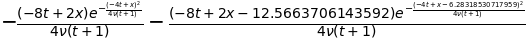

In [59]:
phiprime=phi.diff(x)
phiprime

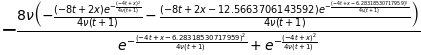

In [60]:
u = -2 *nu *phiprime/phi*4
u

In [61]:
from sympy.utilities.lambdify import lambdify 

In [62]:
u_lamb = lambdify((t,nu,x),u)

In [63]:
type(u_lamb)

function

In [64]:
u_lamb(1,4,3)

In [65]:
# Set parameters.
nx = 101  # number of spatial grid points
L = 2.0 * numpy.pi  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.07  # viscosity
nt = 100  # number of time steps to compute
sigma = 0.1  # CFL limit
dt = sigma * dx**2 / nu  # time-step size

# Discretize the domain.
x = numpy.linspace(0.0, L, num=nx)

In [66]:
u0=numpy.empty(nx)
for i in range(nx):
    u0[i]=u_lamb(0.0,nu,x[i])

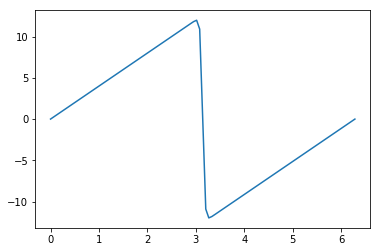

In [68]:
pyplot.plot(x,u0)

In [ ]:
u_hist = [u0.copy()]
u=u0.copy()
for n in range(nt)：
    un = u.copy()
     #update all interiors
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[:-2] - 2 * un[1:-1] + un[2:]))
    #update boundary condition
    u[0]=(un[0] -
          un[0] * dt / dx * (un[0] - un[-2]) +
          nu * dt / dx**2 * (un[-2] - 2 * un[0] + un[-1]))
        
    u[-1]=u[0]
    #Record
    u_hist.append(u.copy())